[View in Colaboratory](https://colab.research.google.com/github/karangautam/Learning-Samples/blob/master/Dogs_Vs_Cats_Redux.ipynb)

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karangautam","key":"7886fb75a6cbe6a3bf59d84dcbab4904"}'}

In [2]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jun  5 20:00 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 /content/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
imagenet-object-detection-challenge             2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-detection-from-video-challenge  2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-localization-challenge          2029-12-31 07:00:00  Research         Knowledge         15           False  
titanic                                         2020-04-07 00:00:00  Getting Started  Knowledge      11237            True  
house-prices-advanced-regression-techniques     2020-03-01 23:59:00  Getting Started  Knowledge       5431            True  
digit-recognizer                                2020-01-07 00:00:00  Getting Started  Knowledge       2549            True  


In [6]:
!kaggle competitions list -s dogs

ref                                 deadline             category       reward  teamCount  userHasEntered  
----------------------------------  -------------------  ----------  ---------  ---------  --------------  
dogs-vs-cats                        2014-02-01 23:59:00  Playground       Swag        215            True  
dogs-vs-cats-redux-kernels-edition  2017-03-02 23:59:00  Playground  Knowledge       1314           False  
dog-breed-identification            2018-02-26 23:59:00  Playground      Kudos       1286            True  
seizure-prediction                  2014-11-17 23:59:00  Research      $25,000        504           False  


In [9]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition 

test.zip: Downloaded 271MB of 271MB to /content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition
train.zip: Downloaded 544MB of 544MB to /content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition
sample_submission.csv: Downloaded 111KB of 111KB to /content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition


In [10]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition"]).decode("utf8"))
#print(check_output(["ls", "../content/.kaggle/competitions/whale-categorization-playground/train/train"]).decode("utf8"))


sample_submission.csv
test.zip
train.zip



In [0]:
import zipfile
zip_ref = zipfile.ZipFile("../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train.zip", "r")
zip_ref.extractall("../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition")
zip_ref.close()

In [12]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition"]).decode("utf8"))
#print(check_output(["ls", "../content/.kaggle/competitions/whale-categorization-playground/train/train"]).decode("utf8"))


sample_submission.csv
test.zip
train
train.zip



In [0]:
import os, shutil

In [0]:
original_dataset_dir = '../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train'

In [0]:
base_dir = '../content/.kaggle/competitions/dogs-vs-cats'                 
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')                                
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')                      
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')                                  
os.mkdir(test_dir)

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')                           
os.mkdir(train_cats_dir)                                                   

train_dogs_dir = os.path.join(train_dir, 'dogs')                           
os.mkdir(train_dogs_dir)   

In [0]:
validation_cats_dir = os.path.join(validation_dir, 'cats')                 
os.mkdir(validation_cats_dir)                                              

validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
os.mkdir(validation_dogs_dir)                                              

test_cats_dir = os.path.join(test_dir, 'cats')                             
os.mkdir(test_cats_dir)                                                    

test_dogs_dir = os.path.join(test_dir, 'dogs')                             
os.mkdir(test_dogs_dir) 

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)      

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)                                              


In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              


In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst)                                              

In [25]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500
total training dog images: 1000
total validation dog images: 500
total test dog images: 500


In [26]:
import keras
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator



In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen= ImageDataGenerator(rescale = 1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
for data_batch, labels_batch in train_generator:
  print('data batch shape: ', data_batch.shape)
  print('labels batch shape: ', labels_batch.shape)
  break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [34]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=50,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/50
100/100 [==============================] - 14s 137ms/step - loss: 0.6892 - acc: 0.5290 - val_loss: 0.7274 - val_acc: 0.5020
Epoch 2/50
100/100 [==============================] - 11s 113ms/step - loss: 0.6638 - acc: 0.5830 - val_loss: 0.6398 - val_acc: 0.6410
Epoch 3/50
100/100 [==============================] - 11s 112ms/step - loss: 0.6228 - acc: 0.6550 - val_loss: 0.6078 - val_acc: 0.6720
Epoch 4/50
 68/100 [===================>..........] - ETA: 2s - loss: 0.5734 - acc: 0.6963

100/100 [==============================] - 11s 113ms/step - loss: 0.5755 - acc: 0.6970 - val_loss: 0.6164 - val_acc: 0.6450
Epoch 5/50
100/100 [==============================] - 11s 113ms/step - loss: 0.5336 - acc: 0.7400 - val_loss: 0.6267 - val_acc: 0.6530
Epoch 6/50
100/100 [==============================] - 11s 112ms/step - loss: 0.5103 - acc: 0.7550 - val_loss: 0.5713 - val_acc: 0.6770
Epoch 7/50
 90/100 [==========================>...] - ETA: 0s - loss: 0.4762 - acc: 0.7678

100/100 [==============================] - 11s 113ms/step - loss: 0.4839 - acc: 0.7660 - val_loss: 0.5717 - val_acc: 0.6980
Epoch 8/50
100/100 [==============================] - 11s 112ms/step - loss: 0.4558 - acc: 0.7805 - val_loss: 0.5453 - val_acc: 0.7150
Epoch 9/50
100/100 [==============================] - 11s 112ms/step - loss: 0.4260 - acc: 0.8130 - val_loss: 0.5498 - val_acc: 0.7130
Epoch 10/50
 91/100 [==========================>...] - ETA: 0s - loss: 0.4091 - acc: 0.8099

100/100 [==============================] - 11s 112ms/step - loss: 0.4073 - acc: 0.8115 - val_loss: 0.5505 - val_acc: 0.7170
Epoch 11/50
100/100 [==============================] - 11s 112ms/step - loss: 0.3727 - acc: 0.8375 - val_loss: 0.5792 - val_acc: 0.7350
Epoch 12/50
100/100 [==============================] - 11s 111ms/step - loss: 0.3532 - acc: 0.8365 - val_loss: 0.5656 - val_acc: 0.7250
Epoch 13/50
 89/100 [=========================>....] - ETA: 0s - loss: 0.3248 - acc: 0.8629

100/100 [==============================] - 11s 112ms/step - loss: 0.3255 - acc: 0.8610 - val_loss: 0.5454 - val_acc: 0.7360
Epoch 14/50
100/100 [==============================] - 11s 112ms/step - loss: 0.3079 - acc: 0.8680 - val_loss: 0.5987 - val_acc: 0.7140
Epoch 15/50
100/100 [==============================] - 11s 113ms/step - loss: 0.2861 - acc: 0.8815 - val_loss: 0.5631 - val_acc: 0.7300
Epoch 16/50
 93/100 [==========================>...] - ETA: 0s - loss: 0.2587 - acc: 0.8952

100/100 [==============================] - 11s 112ms/step - loss: 0.2603 - acc: 0.8935 - val_loss: 0.7098 - val_acc: 0.6890
Epoch 17/50
100/100 [==============================] - 11s 112ms/step - loss: 0.2452 - acc: 0.9075 - val_loss: 0.6215 - val_acc: 0.7310
Epoch 18/50
100/100 [==============================] - 11s 112ms/step - loss: 0.2182 - acc: 0.9220 - val_loss: 0.6873 - val_acc: 0.7100
Epoch 19/50
 91/100 [==========================>...] - ETA: 0s - loss: 0.1988 - acc: 0.9319

100/100 [==============================] - 11s 112ms/step - loss: 0.2030 - acc: 0.9285 - val_loss: 0.6005 - val_acc: 0.7400
Epoch 20/50
100/100 [==============================] - 11s 112ms/step - loss: 0.1756 - acc: 0.9375 - val_loss: 0.6482 - val_acc: 0.7370
Epoch 21/50
100/100 [==============================] - 11s 112ms/step - loss: 0.1643 - acc: 0.9380 - val_loss: 0.6681 - val_acc: 0.7300
Epoch 22/50
 90/100 [==========================>...] - ETA: 0s - loss: 0.1436 - acc: 0.9544

100/100 [==============================] - 11s 112ms/step - loss: 0.1432 - acc: 0.9535 - val_loss: 0.7017 - val_acc: 0.7350
Epoch 23/50
100/100 [==============================] - 11s 112ms/step - loss: 0.1239 - acc: 0.9600 - val_loss: 0.7423 - val_acc: 0.7300
Epoch 24/50
100/100 [==============================] - 11s 112ms/step - loss: 0.1090 - acc: 0.9655 - val_loss: 0.7236 - val_acc: 0.7290
Epoch 25/50
 91/100 [==========================>...] - ETA: 0s - loss: 0.0944 - acc: 0.9725

100/100 [==============================] - 11s 112ms/step - loss: 0.0928 - acc: 0.9725 - val_loss: 0.9356 - val_acc: 0.7130
Epoch 26/50
100/100 [==============================] - 11s 114ms/step - loss: 0.0770 - acc: 0.9785 - val_loss: 0.9228 - val_acc: 0.7260
Epoch 27/50
100/100 [==============================] - 11s 113ms/step - loss: 0.0690 - acc: 0.9835 - val_loss: 0.8585 - val_acc: 0.7370
Epoch 28/50
 91/100 [==========================>...] - ETA: 0s - loss: 0.0529 - acc: 0.9874

100/100 [==============================] - 11s 112ms/step - loss: 0.0526 - acc: 0.9875 - val_loss: 1.0497 - val_acc: 0.7070
Epoch 29/50
100/100 [==============================] - 11s 113ms/step - loss: 0.0446 - acc: 0.9905 - val_loss: 1.1563 - val_acc: 0.7070
Epoch 30/50
100/100 [==============================] - 11s 112ms/step - loss: 0.0421 - acc: 0.9885 - val_loss: 0.9931 - val_acc: 0.7120
Epoch 31/50
 91/100 [==========================>...] - ETA: 0s - loss: 0.0379 - acc: 0.9918

100/100 [==============================] - 11s 113ms/step - loss: 0.0357 - acc: 0.9925 - val_loss: 1.0736 - val_acc: 0.7310
Epoch 32/50
100/100 [==============================] - 11s 112ms/step - loss: 0.0306 - acc: 0.9925 - val_loss: 1.1724 - val_acc: 0.7170
Epoch 33/50
100/100 [==============================] - 11s 112ms/step - loss: 0.0321 - acc: 0.9930 - val_loss: 1.2725 - val_acc: 0.7170
Epoch 34/50
 94/100 [===========================>..] - ETA: 0s - loss: 0.0260 - acc: 0.9920

100/100 [==============================] - 11s 112ms/step - loss: 0.0251 - acc: 0.9925 - val_loss: 1.0801 - val_acc: 0.7480
Epoch 35/50
100/100 [==============================] - 11s 112ms/step - loss: 0.0192 - acc: 0.9965 - val_loss: 1.4636 - val_acc: 0.7130
Epoch 36/50
100/100 [==============================] - 11s 113ms/step - loss: 0.0196 - acc: 0.9965 - val_loss: 1.1982 - val_acc: 0.7300
Epoch 37/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.0194 - acc: 0.9948

100/100 [==============================] - 11s 112ms/step - loss: 0.0188 - acc: 0.9950 - val_loss: 1.1724 - val_acc: 0.7270
Epoch 38/50
100/100 [==============================] - 11s 112ms/step - loss: 0.0176 - acc: 0.9960 - val_loss: 1.1614 - val_acc: 0.7460
Epoch 39/50
100/100 [==============================] - 11s 113ms/step - loss: 0.0100 - acc: 0.9985 - val_loss: 1.2281 - val_acc: 0.7330
Epoch 40/50
 88/100 [=========================>....] - ETA: 0s - loss: 0.0122 - acc: 0.9960

100/100 [==============================] - 11s 112ms/step - loss: 0.0116 - acc: 0.9965 - val_loss: 1.2368 - val_acc: 0.7300
Epoch 41/50
100/100 [==============================] - 11s 112ms/step - loss: 0.0083 - acc: 0.9980 - val_loss: 1.3509 - val_acc: 0.7380
Epoch 42/50
100/100 [==============================] - 11s 113ms/step - loss: 0.0144 - acc: 0.9965 - val_loss: 1.3430 - val_acc: 0.7400
Epoch 43/50
 94/100 [===========================>..] - ETA: 0s - loss: 0.0088 - acc: 0.9963

100/100 [==============================] - 11s 113ms/step - loss: 0.0086 - acc: 0.9965 - val_loss: 1.4530 - val_acc: 0.7170
Epoch 44/50
100/100 [==============================] - 11s 113ms/step - loss: 0.0141 - acc: 0.9945 - val_loss: 1.3374 - val_acc: 0.7360
Epoch 45/50
100/100 [==============================] - 11s 112ms/step - loss: 0.0103 - acc: 0.9965 - val_loss: 1.4561 - val_acc: 0.7340
Epoch 46/50
 95/100 [===========================>..] - ETA: 0s - loss: 0.0069 - acc: 0.9974

100/100 [==============================] - 11s 112ms/step - loss: 0.0067 - acc: 0.9975 - val_loss: 1.4453 - val_acc: 0.7240
Epoch 47/50
100/100 [==============================] - 11s 112ms/step - loss: 0.0048 - acc: 0.9985 - val_loss: 2.1649 - val_acc: 0.6990
Epoch 48/50
100/100 [==============================] - 11s 114ms/step - loss: 0.0100 - acc: 0.9970 - val_loss: 1.4689 - val_acc: 0.7290
Epoch 49/50
 87/100 [=========================>....] - ETA: 0s - loss: 0.0038 - acc: 0.9989

100/100 [==============================] - 11s 113ms/step - loss: 0.0083 - acc: 0.9965 - val_loss: 1.6460 - val_acc: 0.7210
Epoch 50/50
100/100 [==============================] - 11s 113ms/step - loss: 0.0084 - acc: 0.9980 - val_loss: 1.5718 - val_acc: 0.7160


In [0]:
model.save('dogs_and_cats_small_1.h5')

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

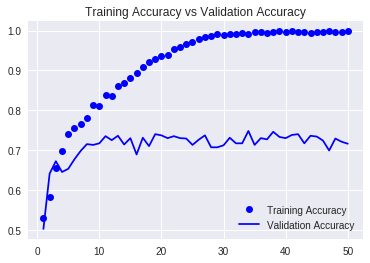

In [38]:
epochs= range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.figure()

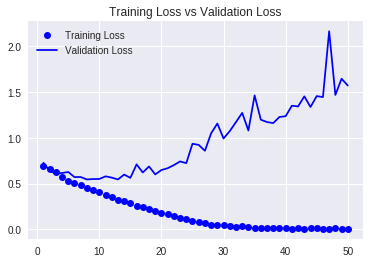

In [39]:
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()

In [0]:
# Data Augmentation
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

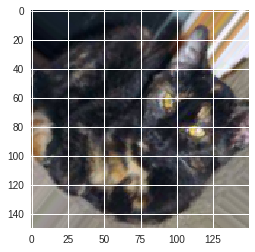

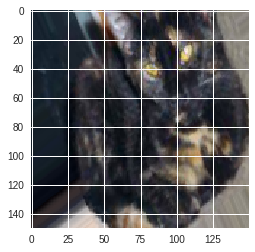

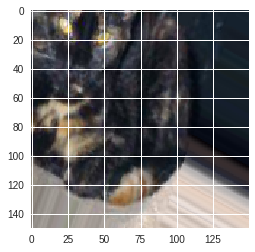

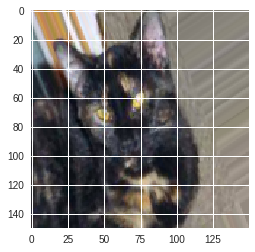

In [45]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[10]  

img = image.load_img(img_path, target_size=(150, 150))  

x = image.img_to_array(img)                                     
x = x.reshape((1,) + x.shape)   

i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [47]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)               

train_generator = train_datagen.flow_from_directory(
        train_dir,                                              
        target_size=(150, 150),                                 
        batch_size=32,
        class_mode='binary')                                    

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 37s 374ms/step - loss: 0.6911 - acc: 0.5303 - val_loss: 0.6784 - val_acc: 0.5971
Epoch 2/100
100/100 [==============================] - 34s 342ms/step - loss: 0.6737 - acc: 0.5816 - val_loss: 0.6494 - val_acc: 0.6180
Epoch 3/100
100/100 [==============================] - 34s 341ms/step - loss: 0.6610 - acc: 0.6000 - val_loss: 0.6411 - val_acc: 0.6161
Epoch 4/100
 11/100 [==>...........................] - ETA: 6s - loss: 0.6538 - acc: 0.6136

100/100 [==============================] - 34s 339ms/step - loss: 0.6440 - acc: 0.6194 - val_loss: 0.6397 - val_acc: 0.6168
Epoch 5/100
100/100 [==============================] - 33s 326ms/step - loss: 0.6325 - acc: 0.6459 - val_loss: 0.6126 - val_acc: 0.6580
Epoch 6/100
100/100 [==============================] - 36s 363ms/step - loss: 0.6137 - acc: 0.6672 - val_loss: 0.5824 - val_acc: 0.6865
Epoch 7/100
 73/100 [====================>.........] - ETA: 6s - loss: 0.5999 - acc: 0.6794

100/100 [==============================] - 34s 338ms/step - loss: 0.5975 - acc: 0.6744 - val_loss: 0.6338 - val_acc: 0.6237
Epoch 8/100
100/100 [==============================] - 34s 338ms/step - loss: 0.5907 - acc: 0.6772 - val_loss: 0.5620 - val_acc: 0.6986
Epoch 9/100
100/100 [==============================] - 35s 347ms/step - loss: 0.5893 - acc: 0.6816 - val_loss: 0.5627 - val_acc: 0.6961
Epoch 10/100
 83/100 [=======================>......] - ETA: 4s - loss: 0.5756 - acc: 0.6969

100/100 [==============================] - 34s 335ms/step - loss: 0.5768 - acc: 0.6962 - val_loss: 0.5516 - val_acc: 0.7094
Epoch 11/100
100/100 [==============================] - 35s 353ms/step - loss: 0.5760 - acc: 0.6878 - val_loss: 0.5705 - val_acc: 0.6910
Epoch 12/100
100/100 [==============================] - 34s 340ms/step - loss: 0.5607 - acc: 0.7084 - val_loss: 0.5496 - val_acc: 0.6999
Epoch 13/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.5642 - acc: 0.6942

100/100 [==============================] - 34s 345ms/step - loss: 0.5622 - acc: 0.6981 - val_loss: 0.5368 - val_acc: 0.7145
Epoch 14/100
100/100 [==============================] - 34s 343ms/step - loss: 0.5494 - acc: 0.7237 - val_loss: 0.5528 - val_acc: 0.7018
Epoch 15/100
100/100 [==============================] - 34s 339ms/step - loss: 0.5559 - acc: 0.7159 - val_loss: 0.5137 - val_acc: 0.7360
Epoch 16/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.5373 - acc: 0.7333

100/100 [==============================] - 34s 342ms/step - loss: 0.5434 - acc: 0.7284 - val_loss: 0.5071 - val_acc: 0.7481
Epoch 17/100
100/100 [==============================] - 33s 325ms/step - loss: 0.5446 - acc: 0.7184 - val_loss: 0.6404 - val_acc: 0.6751
Epoch 18/100
100/100 [==============================] - 37s 373ms/step - loss: 0.5346 - acc: 0.7306 - val_loss: 0.5231 - val_acc: 0.7379
Epoch 19/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.5324 - acc: 0.7418

100/100 [==============================] - 35s 345ms/step - loss: 0.5265 - acc: 0.7462 - val_loss: 0.5399 - val_acc: 0.7234
Epoch 20/100
100/100 [==============================] - 34s 343ms/step - loss: 0.5335 - acc: 0.7375 - val_loss: 0.4988 - val_acc: 0.7494
Epoch 21/100
100/100 [==============================] - 34s 341ms/step - loss: 0.5303 - acc: 0.7275 - val_loss: 0.5120 - val_acc: 0.7341
Epoch 22/100
 83/100 [=======================>......] - ETA: 4s - loss: 0.5187 - acc: 0.7372

100/100 [==============================] - 33s 328ms/step - loss: 0.5181 - acc: 0.7356 - val_loss: 0.5049 - val_acc: 0.7379
Epoch 23/100
100/100 [==============================] - 36s 360ms/step - loss: 0.5131 - acc: 0.7494 - val_loss: 0.5010 - val_acc: 0.7570
Epoch 24/100
100/100 [==============================] - 34s 342ms/step - loss: 0.5216 - acc: 0.7444 - val_loss: 0.5490 - val_acc: 0.7030
Epoch 25/100
 83/100 [=======================>......] - ETA: 4s - loss: 0.5147 - acc: 0.7451

100/100 [==============================] - 34s 341ms/step - loss: 0.5140 - acc: 0.7475 - val_loss: 0.5142 - val_acc: 0.7582
Epoch 26/100
100/100 [==============================] - 34s 339ms/step - loss: 0.5145 - acc: 0.7444 - val_loss: 0.5386 - val_acc: 0.7272
Epoch 27/100
100/100 [==============================] - 34s 340ms/step - loss: 0.5069 - acc: 0.7450 - val_loss: 0.4667 - val_acc: 0.7773
Epoch 28/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.4932 - acc: 0.7626

100/100 [==============================] - 35s 352ms/step - loss: 0.4917 - acc: 0.7625 - val_loss: 0.4800 - val_acc: 0.7728
Epoch 29/100
100/100 [==============================] - 34s 341ms/step - loss: 0.5007 - acc: 0.7556 - val_loss: 0.4906 - val_acc: 0.7614
Epoch 30/100
100/100 [==============================] - 34s 338ms/step - loss: 0.4895 - acc: 0.7584 - val_loss: 0.4672 - val_acc: 0.7754
Epoch 31/100
 83/100 [=======================>......] - ETA: 4s - loss: 0.4863 - acc: 0.7703

100/100 [==============================] - 35s 346ms/step - loss: 0.4846 - acc: 0.7709 - val_loss: 0.4933 - val_acc: 0.7525
Epoch 32/100
100/100 [==============================] - 34s 343ms/step - loss: 0.4928 - acc: 0.7544 - val_loss: 0.5217 - val_acc: 0.7519
Epoch 33/100
100/100 [==============================] - 34s 340ms/step - loss: 0.4784 - acc: 0.7741 - val_loss: 0.4892 - val_acc: 0.7500
Epoch 34/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.4901 - acc: 0.7615

100/100 [==============================] - 32s 323ms/step - loss: 0.4838 - acc: 0.7634 - val_loss: 0.4819 - val_acc: 0.7544
Epoch 35/100
100/100 [==============================] - 37s 370ms/step - loss: 0.4784 - acc: 0.7663 - val_loss: 0.4475 - val_acc: 0.7849
Epoch 36/100
 99/100 [============================>.] - ETA: 0s - loss: 0.4814 - acc: 0.7655

KeyboardInterrupt: ignored

In [0]:
model.save('cats_and_dogs_small_2.h5')